# Init
- - -
## Data import

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.image import *

from tensorflow.keras.optimizers import *
import tensorflow_addons as tfa

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import importlib

import my_models as mds
import mytool as mt

np.set_printoptions(precision=6, suppress=True) # 과학적 표기법 e 대신 소수점 6자리까지만 나옴

<br/>

# Data 
- - -

In [51]:
#x_data =  np.load('/content/drive/MyDrive/Lab/AEDP/X.npy')
x_data =  np.load('./data/X_none_C.npy')
y_data =  np.load('./data/Y_none_C.npy')

In [52]:
x_data = x_data/255
x_data = np.expand_dims(x_data, -1)          
print(x_data.shape)
print(y_data.shape)

(3156, 150, 150, 1)
(3156,)


In [53]:
unique, counts = np.unique(y_data, return_counts=True)

result = np.column_stack((unique, counts)) 

print(result)

[[ 20 756]
 [ 30 564]
 [ 40 660]
 [ 50 519]
 [ 60 392]
 [ 70 265]]


In [54]:
# value, idx=np.unique(y_data,return_inverse=True)
# idx_list = []
# for i in range(len(idx)):
#     if(value[idx[i]] == 60 or value[idx[i]] == 70):
#          idx_list.append(i)

# y_data = np.delete(y_data, idx_list)
# x_data = np.delete(x_data, idx_list,0)

In [55]:
print(x_data.shape)
print(y_data.shape)

(3156, 150, 150, 1)
(3156,)


In [56]:
#data shuffle
nRow = x_data.shape[0]
idx_randmix = np.array(range(nRow))
np.random.seed(99)
np.random.shuffle(idx_randmix)
x_data = x_data[idx_randmix, :, :, :]
y_data = y_data[idx_randmix]

In [57]:
n = round((len(x_data)*0.8))

train = x_data[:n]
label = y_data[:n]

x_test = x_data[n:]
y_test = y_data[n:]

## Data augmentation

In [58]:
unique, counts = np.unique(label, return_counts=True)

result = np.column_stack((unique, counts)) 

print(result)

[[ 20 600]
 [ 30 450]
 [ 40 533]
 [ 50 416]
 [ 60 309]
 [ 70 217]]


In [59]:
value, i=np.unique(label,return_inverse=True)
x_60 = []
x_70 = []
for idx in range(len(i)):
    if(value[i[idx]] == 60):
        x_60.append(train[idx])
    if(value[i[idx]] == 70):
        x_70.append(train[idx])

In [60]:
print(f"{np.shape(x_60)}      {np.shape(x_70)}")

(309, 150, 150, 1)      (217, 150, 150, 1)


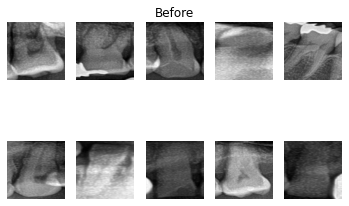

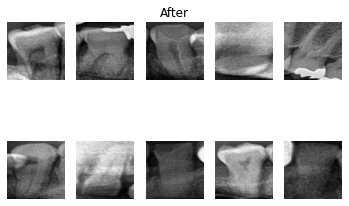

In [61]:
test = x_60[:100]
image_list = test
result_60 = np.empty(shape=(len(test), 150, 150, 1))
##(3) 이미지 augmentation
for i in range (len(test)):
    ## 모두 horizontal flipping
    ## 8~15 : flipped
    flipped_img = tf.image.flip_left_right(image_list[i])
    flipped_img = tf.image.flip_up_down(flipped_img)
    result_60[i] = flipped_img

    
    
##변경전 이미지  
abc = x_60[:10]

for c in range (len(abc)):
    if c == 3:
      plt.title("Before")
    plt.subplot(2,5,c+1)
    plt.axis('off')
    plt.imshow(abc[c],cmap='gray')
  
plt.show()


##변경후 이미지
for c in range (10):
    if c == 3:
      plt.title("After")
    plt.subplot(2,5,c+1)
    plt.axis('off')
    plt.imshow(result_60[c],cmap='gray')
plt.show()

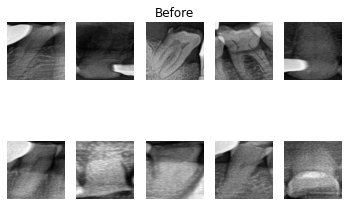

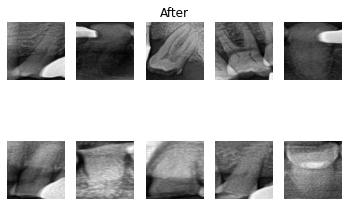

In [62]:
test = x_70[:150]
image_list = test
result_70 = np.empty(shape=(len(test), 150, 150, 1))
##(3) 이미지 augmentation
for i in range (len(test)):
    ## 모두 horizontal flipping
    ## 8~15 : flipped
    flipped_img = tf.image.flip_left_right(image_list[i])
    flipped_img = tf.image.flip_up_down(flipped_img)
    result_70[i] = flipped_img

    
    
##변경전 이미지  
abc = x_70[:10]

for c in range (len(abc)):
    if c == 3:
      plt.title("Before")
    plt.subplot(2,5,c+1)
    plt.axis('off')
    plt.imshow(abc[c],cmap='gray')
  
plt.show()


##변경후 이미지
for c in range (10):
    if c == 3:
      plt.title("After")
    plt.subplot(2,5,c+1)
    plt.axis('off')
    plt.imshow(result_70[c],cmap='gray')
plt.show()

In [63]:
print(result_60.shape)
print(result_70.shape)
print("---------------")

y_1= np.array([60 for j in range(100)])
y_2= np.array([70 for j in range(150)])

result_x = np.concatenate((result_60,result_70),axis=0)
result_y = np.concatenate((y_1,y_2),axis=0)

print(result_x.shape)
print(result_y.shape)

(100, 150, 150, 1)
(150, 150, 150, 1)
---------------
(250, 150, 150, 1)
(250,)


In [64]:
train = np.concatenate((train,result_x),axis=0)
label = np.concatenate((label,result_y),axis=0)

unique, counts = np.unique(label, return_counts=True)

result = np.column_stack((unique, counts)) 

print(result)

[[ 20 600]
 [ 30 450]
 [ 40 533]
 [ 50 416]
 [ 60 409]
 [ 70 367]]


<br/>

## Data normalization

In [65]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(label)
label = encoder.transform(label)

In [66]:
encoder = LabelEncoder()
encoder.fit(y_test)
y_test = encoder.transform(y_test)

In [67]:
print(np.unique(label))

[0 1 2 3 4 5]


In [68]:
label = (label + 0.5) / 6
y_test = (y_test + 0.5) / 6
#y_data = (y_data + 0.5) / 4

In [69]:
print(np.unique(label))

[0.083333 0.25     0.416667 0.583333 0.75     0.916667]


In [70]:
m = round((len(train)*0.8))

x_train = train[:m]
y_train = label[:m]

x_val = train[m:]
y_val = label[m:]

In [71]:
unique, counts = np.unique(y_train, return_counts=True)

result = np.column_stack((unique, counts)) 

print(result)

[[  0.083333 522.      ]
 [  0.25     395.      ]
 [  0.416667 464.      ]
 [  0.583333 368.      ]
 [  0.75     269.      ]
 [  0.916667 202.      ]]


<br/>

# Train
- - -

In [72]:
print(f'x_train shape => {x_train.shape}     y_train shape =>{y_train.shape}')
print(f'x_val shape => {x_val.shape}     y_val shape =>{y_val.shape}')
print(f'x_test shape => {x_test.shape}     y_test shape =>{y_test.shape}')

x_train shape => (2220, 150, 150, 1)     y_train shape =>(2220,)
x_val shape => (555, 150, 150, 1)     y_val shape =>(555,)
x_test shape => (631, 150, 150, 1)     y_test shape =>(631,)


In [102]:
class MyCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self,epoch, logs=None):
        if( epoch % 100 == 0 ):
            print('epoch : {}    loss  : {:.4f}    val_loss  : {:.4f}'.format(epoch+1,logs['loss'],logs['val_loss']))
            
    def on_train_end(self,logs=None):
        print('train END => loss  : {:.4f}    val_loss  : {:.4f}'.format(logs['loss'],logs['val_loss']))
        
        
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=40, mode='min')

In [103]:
# from keras import backend as K

# def MPE(y_true, y_pred):
#     loss = K.mean(((y_test-y_pred) / y_test) * 100)
#     return loss


In [104]:
#reload libs
importlib.reload(mds)
model = mds.cnn_regress(x_data.shape[1:])
#opt = tfa.optimizers.RectifiedAdam(learning_rate=0.0001)
opt = Adam(learning_rate=0.0001)
#opt = SGD(learning_rate=0.0005, decay = 0.000001, momentum = 0.9, nesterov= True)
#opt = SGD(learning_rate=0.0001,momentum = 0.9, nesterov= True)
#opt = Nadam(learning_rate=0.0001)
model.compile(loss='mean_squared_error',  #mse를 쓰면 영향력이 적은 특징들에 제곱을 주어 0에 가깝게 만들어줌
             optimizer=opt,
             metrics=['mae']
             )  

model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 random_flip_6 (RandomFlip)  (None, 150, 150, 1)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 150, 150, 8)       80        
                                                                 
 batch_normalization_30 (Bat  (None, 150, 150, 8)      32        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 75, 75, 16)        1168

In [105]:
history = model.fit(
    x=x_train, y=y_train,
    validation_data = (x_val, y_val),
    epochs=1000,
    batch_size=16,
    verbose=0,
    callbacks =[MyCallback(),ES],
)

#rmse_train = mt.calRMSE(model, x_train, y_train, batch_size=32)
#print(f'RMSE Train = {rmse_train}')


epoch : 1    loss  : 0.1241    val_loss  : 0.1019
epoch : 101    loss  : 0.0356    val_loss  : 0.0491
epoch : 201    loss  : 0.0272    val_loss  : 0.0305
epoch : 301    loss  : 0.0215    val_loss  : 0.0280
epoch : 401    loss  : 0.0182    val_loss  : 0.0212
epoch : 501    loss  : 0.0162    val_loss  : 0.0185
train END => loss  : 0.0144    val_loss  : 0.0173


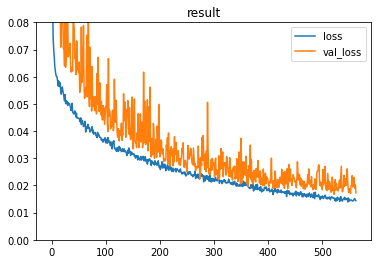

In [106]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot().set_ylim(0.0,0.08)
plt.title('result')
plt.show()

In [107]:
p_test =[]
p_test_tmp = model.predict(x_test)
rmse_test = np.sqrt(np.mean(np.power(p_test_tmp.reshape(-1, ) - y_test, 2)))
print(f'RMSE Test = {rmse_test}')

p_test = p_test_tmp

RMSE Test = 0.15654174584582226


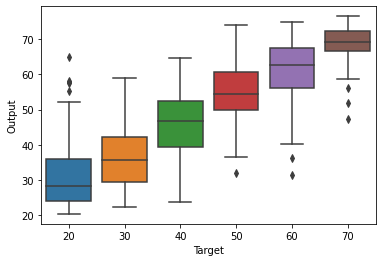

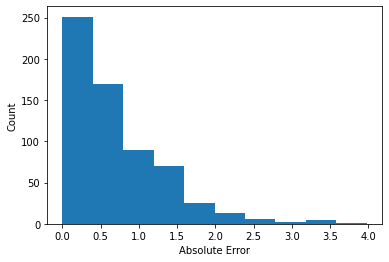

RMSE Test = 0.15654174584582226
오차범위 : 0.0 => 정확도 : 0.00000
오차범위 : 0.1 => 정확도 : 0.12203
오차범위 : 0.2 => 정확도 : 0.20127
오차범위 : 0.3 => 정확도 : 0.29160
오차범위 : 0.4 => 정확도 : 0.39778
오차범위 : 0.5 => 정확도 : 0.46276
오차범위 : 0.6 => 정확도 : 0.53407
오차범위 : 0.7 => 정확도 : 0.59746
오차범위 : 0.8 => 정확도 : 0.66561
오차범위 : 0.9 => 정확도 : 0.71157
오차범위 : 1.0 => 정확도 : 0.75594
오차범위 : 1.1 => 정확도 : 0.78288
오차범위 : 1.2 => 정확도 : 0.81141
오차범위 : 1.3 => 정확도 : 0.83835
오차범위 : 1.4 => 정확도 : 0.87797
오차범위 : 1.5 => 정확도 : 0.90174


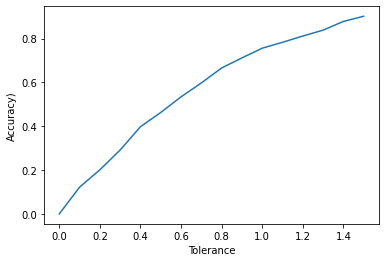

In [108]:
class_cnt = 6
importlib.reload(mt)
#############################
# box plot 그리기
mt.drawBoxPlot(p_test, y_test, class_cnt)

#############################
# 오차정도histogram
plt.hist(np.abs(p_test.reshape(-1) - y_test)*class_cnt)
plt.xlabel('Absolute Error')
plt.ylabel('Count')
plt.show()

#rmse for all

rmse_test = np.sqrt(np.mean(np.power(p_test.reshape(-1, ) - y_test, 2)))
print(f'RMSE Test = {rmse_test}')

#오차별 정확도
n = 16
acc = np.zeros(n)
for i in range(n):
    th = i/10  # th =  0.1이 한살임    
    acc[i] = 1- sum(np.abs(p_test.reshape(-1,) - y_test)*class_cnt > th)/p_test.shape[0]
    print(f'오차범위 : {th:0.1f} => 정확도 : {acc[i]:0.5f}')


plt.plot(np.array(range(n))/10, acc)
plt.xlabel('Tolerance')
plt.ylabel('Accuracy)')
plt.show()


In [110]:
cm_merged = np.zeros([6, 6])
count = len(x_test)
for n in range(count):
        #정답
    r = int(y_test[n]*6)
        #예측값
    c = int(p_test[n]*6)
    cm_merged[r,c] += 1
    

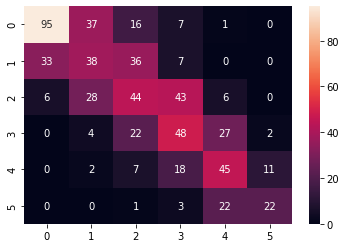

In [111]:
cm_merged_df2 = pd.DataFrame(cm_merged)
sns.heatmap(cm_merged_df2, annot=True , fmt='g')
plt.show()

In [112]:
np.corrcoef(p_test.reshape(-1), y_test)[0,1]

0.8201425828819235

In [109]:
#model.save("./model/20_70_90_Adam", save_format='h5')